In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()
print(training_set[1:5])

[[331.27]
 [329.83]
 [328.34]
 [322.04]]


In [26]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[0:20])

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.0614257 ]
 [0.07474514]
 [0.02797827]
 [0.02379269]
 [0.02409033]
 [0.0159238 ]
 [0.01078949]
 [0.00967334]
 [0.01642607]
 [0.02100231]]


In [28]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train[0:11])

[[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
  0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
  0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
  0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
  0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
  0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
  0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
  0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
  0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
  0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 0.07984225 0.0643277  0.0585423
  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514 0.02797827
  0.02379269 0.02409033 0.0159238  0.01078949 0.00967334 0.01642607
  0.02100231 0.02280676 0.02273235 0.02810849 0.03212665 0.0433812
  0.04475779 0.04790163 0.0440695  0.04648783 0.04

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
# Initialising the RNN
regressor = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


In [9]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [10]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [11]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [12]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 21s 66ms/step - loss: 0.0848
Epoch 2/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0055
Epoch 3/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0045
Epoch 4/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0044
Epoch 5/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0035
Epoch 8/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0035
Epoch 9/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0040
Epoch 13/100
38/38 [====

38/38 [==============================] - 2s 53ms/step - loss: 0.0014


In [14]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [15]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

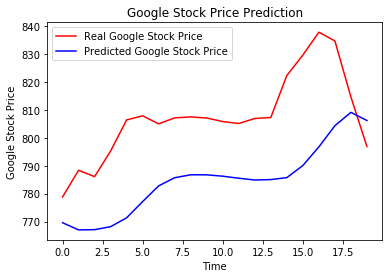

In [16]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()